In [1]:
from pybaseball import *
import pandas
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import seaborn as sns

%matplotlib inline

In [5]:
season_data = statcast('2018-01-01', '2018-12-31')

This is a large query, it may take a moment to complete
Completed sub-query from 2018-01-01 to 2018-12-31


In [6]:
season_data.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,0,SL,2018-10-28,84.0,3.0549,5.2558,Chris Sale,592518.0,519242.0,strikeout,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
1,1,FF,2018-10-28,95.3,3.1661,5.5011,Chris Sale,592518.0,519242.0,NaN,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
2,2,FF,2018-10-28,96.4,3.0728,5.5353,Chris Sale,592518.0,519242.0,NaN,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
3,3,CH,2018-10-28,86.6,3.1019,4.9820,Chris Sale,592518.0,519242.0,NaN,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard
4,4,SL,2018-10-28,78.5,3.3075,5.1633,Chris Sale,571771.0,519242.0,strikeout,...,1.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,Standard,Standard


In [7]:
season_data.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

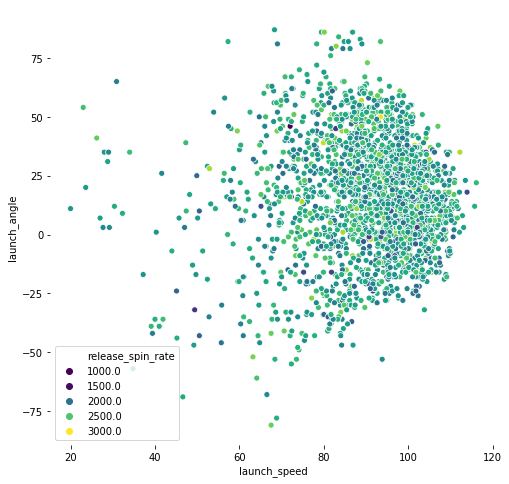

In [16]:
contact_events = ['ground_ball', 'fly_ball', 'popup', 'line_drive']
is_contact = season_data.bb_type.isin(contact_events)
is_fastball = season_data.pitch_type == 'FF'

fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(
    x=season_data[is_contact & is_fastball]['launch_speed'],
    y=season_data[is_contact & is_fastball]['launch_angle'],
    hue=season_data[is_contact & is_fastball]['release_spin_rate'],
    palette='viridis',
    ax=ax,
)

In [19]:
season_data.pitch_name.unique()

array(['Slider', '4-Seam Fastball', 'Changeup', nan, 'Cutter',
       '2-Seam Fastball', 'Curveball', 'Knuckle Curve', 'Sinker',
       'Split Finger', 'Forkball', 'Knuckle Ball', 'Pitch Out',
       'Screwball', 'Eephus'], dtype=object)